### Linear Regression on Boston Housing Dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import  fetch_openml
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
housing = fetch_openml(name="Boston", as_frame=True)
housing

/home/vijeth/learning/ml-lab/ml-lab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [37]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [38]:
df["TARGET"] = housing.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [39]:
X = df[["RM"]]
y = df["TARGET"]
print(X.shape)
print(y.shape)


(506, 1)
(506,)


In [40]:
# Independent Variable
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [41]:
# Dependent Variable
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: TARGET, Length: 506, dtype: float64

In [42]:
X = X.apply(pd.to_numeric, errors='coerce')
X.isnull().sum()        # get the null values (There is no null values in this)

RM    0
dtype: int64

In [43]:
X.fillna(X.mean(), inplace=True)    # optional for this (Used to fill the null value places with mean)

In [44]:
# Split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42 , test_size=0.3)

In [45]:
X_train.shape, X_test.shape

((354, 1), (152, 1))

In [46]:
y_train.shape, y_test.shape

((354,), (152,))

In [47]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
y_pred.shape, y_test.shape

((152,), (152,))

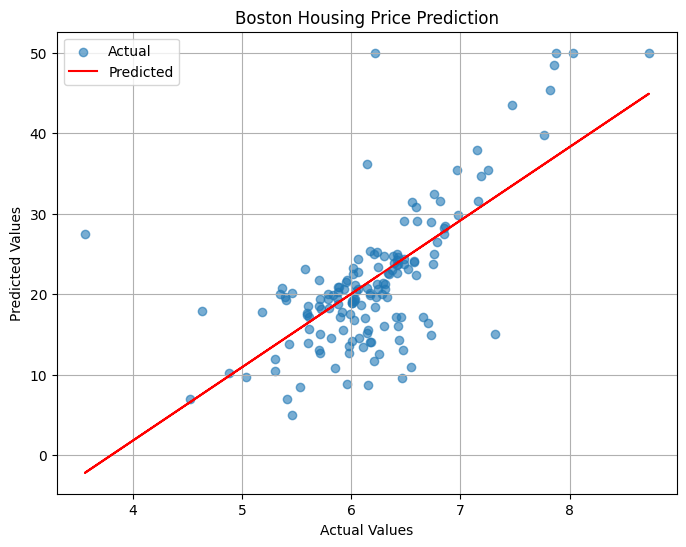

In [55]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test, y_test, alpha=0.6, label="Actual")

plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Boston Housing Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE):  40.35144969787305


In [51]:
print("R2_Score: ", r2_score(y_test, y_pred)*100)

R2_Score:  45.84649934303068


In [52]:
X_test["RM"]

173    6.416
274    6.758
491    5.983
72     6.065
452    6.297
       ...  
441    6.406
23     5.813
225    8.725
433    6.436
447    6.251
Name: RM, Length: 152, dtype: float64